In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
general_data = pd.read_csv("../population-segmentation-data/general_data.csv", sep=";")
customer_data = pd.read_csv("../population-segmentation-data/customer_data.csv", sep=";")
train_data = pd.read_csv("../population-segmentation-data/train_data.csv", sep=";")
test_data = pd.read_csv("../population-segmentation-data/test_data.csv", sep=";")

In [3]:
train_data.head()

,Unnamed: 0,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,2,1,1.0,9.0,7.0,0.0,-1.0,0.0,0.0,1.0,...,6.0,4.0,2.0,-1.0,9.0,2.0,3,0,1,4
3,3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [4]:
# Getting the name of the extra column
extra_col = list(general_data.columns)[0]
print(extra_col)

# Removing the extra column in every dataframe since it is redundant
general_data.drop(extra_col, axis=1, inplace=True)
customer_data.drop(extra_col, axis=1, inplace=True)
train_data.drop(extra_col, axis=1, inplace=True)
test_data.drop(extra_col, axis=1, inplace=True)

Unnamed: 0


In [5]:
train_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,0.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,0.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1,1.0,9.0,7.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,6.0,4.0,2.0,-1.0,9.0,2.0,3,0,1,4
3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,0.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,0.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


(array([42419.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   532.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

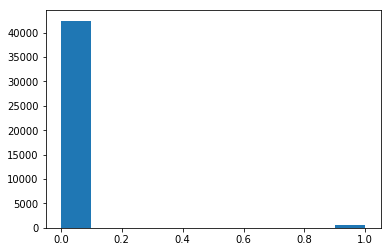

In [6]:
# Graphing the distribution of the RESPONSE variable
plt.hist(train_data["RESPONSE"])

In [7]:
# Calculating the percentage of positive outcomes
len(train_data[train_data["RESPONSE"]==1]) / len(train_data)

0.01238620753882331